### Import Libraries & Functions

In [98]:
%run Libraries.ipynb

In [2]:
class ObjectOrientedPorto:
    """
    Create instance by merging train and test
    """
    def __init__(self,train,test):
        print('Object Oriented Instance Created')
        self.y_train=train['target']
        self.x_train=train.drop('target',axis=1)
        self.x_test=test
        print("Train Size{}".format(train.shape))
        print("Test Size{}".format(test.shape))

        
        
    def merge_train_test(self):
        """
        merge train and test to a DF to do basic Descriptive Stats analysis
        """
        merged_data=pd.concat([self.x_train,self.x_test],axis=0)
        merged_data.reset_index(drop=True,inplace=True)
        print("Data Merged. Total Rows {}".format(merged_data.shape))
        return merged_data
    
    
    def _info(self,data):
        """
        prepare meta data to manage processes
        """
        local_merged_data=data
        
        level=[]
        for feature in local_merged_data.columns:
            if 'cat' in feature or feature=='id':
                level.append('nominal')
            elif 'bin' in feature:
                level.append('binary')
            elif local_merged_data[feature].dtypes=='int64':
                level.append('ordinal')
            elif local_merged_data[feature].dtypes=='float64':
                level.append('interval')
                
        meta=pd.DataFrame(level,columns=['level'])
        meta['role']=['id' if feature=='id' else 'input' for feature in local_merged_data.columns]
        meta.index=local_merged_data.columns
        meta['keep']=True        
        meta['dtype']=[local_merged_data[feature].dtype for feature in local_merged_data.columns]
        meta['Missing_Count']=list(map(lambda x: sum(local_merged_data[x]==-1),local_merged_data.columns))
        meta['Missing_Percent']=round(meta['Missing_Count']*100/local_merged_data.shape[0],2)
        meta.loc[meta['Missing_Percent']>25, 'keep']=False# we wont use these variables at all
        meta.loc['id','keep']=False
        return meta                
                
                
    def describe_data(self,data,meta_data,var_type):
        """
        this output will help us understand the range,variance and if scaling is needed etc.
        Var_type can be interval, ordinal or nominal
        """
        temp=meta_data[(meta_data.level==var_type) & (meta_data.keep)].index
        print("{} Variable".format(var_type))
        print("=======================")
        return(data[temp].describe()) 

### Exploratory Data Analysis

In [112]:
%%time
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Wall time: 12.9 s


In [4]:
porto_instance=ObjectOrientedPorto(train,test)
all_data=porto_instance.merge_train_test()

Object Oriented Instance Created
Train Size(595212, 59)
Test Size(892816, 58)
Data Merged. Total Rows (1488028, 58)


In [5]:
#Add a new column. i.e total number of NA per RECORD. This is part of Feature Engineering
all_data['NA_count']=np.sum(all_data.apply(lambda x:x==-1),axis=1)

In [6]:
meta_data=porto_instance._info(all_data)
print(meta_data.head())

                 level   role   keep  dtype  Missing_Count  Missing_Percent
id             nominal     id  False  int64              0             0.00
ps_ind_01      ordinal  input   True  int64              0             0.00
ps_ind_02_cat  nominal  input   True  int64            523             0.04
ps_ind_03      ordinal  input   True  int64              0             0.00
ps_ind_04_cat  nominal  input   True  int64            228             0.02


In [7]:
porto_instance.describe_data(all_data,meta_data,"interval")

interval Variable


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,6.110305e-01,4.395943e-01,5.514848e-01,3.799519e-01,8.134878e-01,2.763614e-01,3.067355e+00,4.496817e-01,4.501073e-01,4.499718e-01
std,2.876763e-01,4.045123e-01,7.938159e-01,5.836187e-02,2.247024e-01,3.569623e-01,7.299510e-01,2.872071e-01,2.871817e-01,2.872136e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.506191e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e-01,2.000000e-01,5.250000e-01,3.162278e-01,6.710052e-01,3.339162e-01,2.828427e+00,2.000000e-01,2.000000e-01,2.000000e-01
50%,7.000000e-01,3.000000e-01,7.211103e-01,3.741657e-01,7.660406e-01,3.687818e-01,3.316625e+00,4.000000e-01,5.000000e-01,5.000000e-01
75%,9.000000e-01,6.000000e-01,1.001561e+00,4.000000e-01,9.061429e-01,3.964846e-01,3.605551e+00,7.000000e-01,7.000000e-01,7.000000e-01
max,9.000000e-01,1.800000e+00,4.423517e+00,1.264911e+00,4.031301e+00,6.363961e-01,3.741657e+00,9.000000e-01,9.000000e-01,9.000000e-01


In [8]:
porto_instance.describe_data(all_data,meta_data,"ordinal")

ordinal Variable


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,NA_count
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,1.901574e+00,4.417567e+00,1.241038e-02,7.298086e+00,2.346392e+00,2.371666e+00,1.885551e+00,7.688461e+00,3.008052e+00,9.225874e+00,2.338736e+00,8.439336e+00,5.439640e+00,1.440927e+00,2.873923e+00,7.539831e+00,1.422522e+00
std,1.985417e+00,2.700054e+00,1.273684e-01,3.543585e+00,8.320187e-01,1.117059e+00,1.136029e+00,1.333837e+00,1.414919e+00,1.460205e+00,1.247940e+00,2.905658e+00,2.331197e+00,1.201557e+00,1.694398e+00,2.746189e+00,9.399471e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,1.000000e+00
50%,1.000000e+00,4.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00,3.000000e+00,9.000000e+00,2.000000e+00,8.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,2.000000e+00
75%,3.000000e+00,6.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,3.000000e+00,3.000000e+00,9.000000e+00,4.000000e+00,1.000000e+01,3.000000e+00,1.000000e+01,7.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,2.000000e+00
max,7.000000e+00,1.100000e+01,4.000000e+00,1.300000e+01,3.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,9.000000e+00,1.200000e+01,7.000000e+00,2.500000e+01,2.000000e+01,1.100000e+01,1.500000e+01,2.800000e+01,8.000000e+00


In [9]:
meta_data

,level,role,keep,dtype,Missing_Count,Missing_Percent
id,nominal,id,False,int64,0,0.00
ps_ind_01,ordinal,input,True,int64,0,0.00
ps_ind_02_cat,nominal,input,True,int64,523,0.04
ps_ind_03,ordinal,input,True,int64,0,0.00
ps_ind_04_cat,nominal,input,True,int64,228,0.02
ps_ind_05_cat,nominal,input,True,int64,14519,0.98
ps_ind_06_bin,binary,input,True,int64,0,0.00
ps_ind_07_bin,binary,input,True,int64,0,0.00
ps_ind_08_bin,binary,input,True,int64,0,0.00
ps_ind_09_bin,binary,input,True,int64,0,0.00


In [10]:
#porto_instance.describe_data(all_data,meta_data,"nominal") #this would not make sense hence commenting it out

In [11]:
class Preprocess():
    
    def __init__(self,all_data,val_needed=None,val_size=None):
        """
        all_data is a DF
        """
        print("Preprocess Object Created")
        self.all_data=all_data
        if val_needed==None:
            self.val_needed=False
        else:
            self.val_needed=val_needed
        
        if val_size==None:
            self.val_size=0.3
        else:
            self.val_size=val_size            
    
    def _get_train_test_val_split(self):
        """
        return a dic with keys X_train,y_train,X_val,y_val,X_test( val optional )
        """
        all_data_local=self.all_data
        data_dic={}
        train_data=all_data_local.head(train.shape[0])
        test_data=all_data_local.tail(test.shape[0])
        if self.val_needed:
            X_train, X_val,y_train, y_val=train_test_split(train_data,train['target'],test_size=self.val_size,random_state=1)
            data_dic['X_val']=X_val
            data_dic['y_val']=y_val
            data_dic['X_train']=X_train
            data_dic['y_train']=y_train
        else:
            data_dic['X_train']=train_data
            data_dic['y_train']=train['target']
        
        data_dic['X_test']=test_data
        return data_dic
    
        
    def fillna(self,data_dic,meta_data):
        """
        #input- 1)dic with train,val(optional) and test data 2) meta data
        
        Keep nominal variables with NA as is (-1)
        Replace interval NA variables by median
        Replace ordinal  NA variables by mode
        
        #output- 1)returns the dictionary(as input) back after imputing the Nulls
                 2) meta data after updating of MissingCount and MissingPercent columns
        
        """
        info=meta_data.copy()
        get_data=data_dic.copy()
        
        interval_features=(info [(info['keep'])&(info['Missing_Count']>0)& (info['level']=='interval')]).index
        ordinal_features=(info [(info['keep'])&(info['Missing_Count']>0)& (info['level']=='ordinal')]).index

        for i in interval_features:
            get_data['X_train'][i]=get_data['X_train'][i].replace(-1,get_data['X_train'][i].median())
            if self.val_needed:
                get_data['X_val'][i]=get_data['X_val'][i].replace(-1,get_data['X_train'][i].median())
                
            get_data['X_test'][i]=get_data['X_test'][i].replace(-1,get_data['X_train'][i].median())
            info.loc[i,['Missing_Count','Missing_Percent']]=0
        
        for j in ordinal_features:
            get_data['X_train'][j]=get_data['X_train'][i].replace(-1,get_data['X_train'][i].mode()[0])
            if self.val_needed:
                get_data['X_val'][j]=get_data['X_val'][i].replace(-1,get_data['X_train'][i].mode()[0])
            get_data['X_test'][j]=get_data['X_test'][i].replace(-1,get_data['X_train'][i].mode()[0])
            info.loc[j,['Missing_Count','Missing_Percent']]=0
            
        return (get_data,info)


    
    def new_var_creation(self,data_dic,meta_data):
        """
        create any new variable here. ( by merging categorical columns)
        1) input a dic of train, val(optional) and test data
        2) output a) a new dic with new columns added b) new meta data with the updated columns
        """
        combs = [('ps_reg_01', 'ps_car_02_cat'), ('ps_reg_01', 'ps_car_04_cat')]
        meta_data1=meta_data.copy()
        data_dic=data_dic.copy()
        for n_c, (f1, f2) in enumerate(combs):
            name1 = f1 + "_plus_" + f2
            data_dic['X_train'][name1] = data_dic['X_train'][f1].apply(lambda x: str(x)) + "_" + data_dic['X_train'][f2].apply(lambda x: str(x))
            if self.val_needed:
                data_dic['X_val'][name1] = data_dic['X_val'][f1].apply(lambda x: str(x)) + "_" + data_dic['X_val'][f2].apply(lambda x: str(x))
            data_dic['X_test'][name1] = data_dic['X_test'][f1].apply(lambda x: str(x)) + "_" + data_dic['X_test'][f2].apply(lambda x: str(x))
            # Label Encode
            lbl = LabelEncoder()
            if self.val_needed:
                lbl.fit(list(data_dic['X_train'][name1].values)+list(data_dic['X_val'][name1].values)+list(data_dic['X_test'][name1].values))
                data_dic['X_val'][name1] = lbl.transform(list(data_dic['X_val'][name1].values))
            else:
                lbl.fit(list(data_dic['X_train'][name1].values)+list(data_dic['X_test'][name1].values))
                
            data_dic['X_train'][name1] = lbl.transform(list(data_dic['X_train'][name1].values))
            
            data_dic['X_test'][name1] = lbl.transform(list(data_dic['X_test'][name1].values))
            #['level','role','keep','dtype','Missing_Count','Missing_Percent']
            meta_data1.loc[name1]=['nominal','input',True,'int64',0,0]             
        return (data_dic,meta_data1)

            
    def check_cardinality(self,data_dic,meta_data):
        """
        #input - 1)dic with train,val and test data 2) meta data
        Gives the number of distict levels for each categorical variable
        #output- prints each nominal variables and the count of cardinalities within train data
        """
        nominal_features=(meta_data[(meta_data['keep'])& (meta_data['level']=='nominal')]).index
        for i in nominal_features:
            print('variable {} has {} distinct levels in training data'.format(i,data_dic['X_train'][i].value_counts().shape[0]))
            
    def fix_cardinality_TE(self,data_dic,meta_data,column_name):  #Target Encoded
        """
        #input - 1)dic with train,val(optional) and test data 2) meta data 3) Column name ( cardinality will be fixed for this)
         fix cardinality for a COLUMN ( variable that has too many dictinct levels). By P(1) 
        for that level or apriori if the level doesnot exist. This will give 3 series as output.
        Add them then to the data ( train, val, test ) with post script _TE ( target encoded )
        #output- 1) dic as the input but with cardinality replaced by Probability
                 2) meta data after updation ( keep False for the original column)
        """
        data=data_dic.copy()
        info=meta_data #intentional .copy() not used
        
        
        if self.val_needed:
            train_encoded,val_encoded, test_encoded= target_encode(val_needed=self.val_needed,trn_series=data['X_train'][column_name],\
                                                               val_series=data['X_val'][column_name],tst_series=data['X_test'][column_name],\
                                                               target=data['y_train']) 
        else:
            
            train_encoded,test_encoded= target_encode(val_needed=self.val_needed,trn_series=data['X_train'][column_name],tst_series=data['X_test'][column_name],\
                                                               target=data['y_train'])
            
        data['X_train'][column_name+'_TE']=train_encoded
        if self.val_needed:
            data['X_val'][column_name+'_TE']=val_encoded
        data['X_test'][column_name+'_TE']=test_encoded
        #update the meta data
        info.loc[column_name,'keep']=False        
        return (data,info)
    
    def fix_cardinality_FE(self,data_dic,meta_data,column_names): #Frequency Encoding
        """
        the inputs must be passed as a dic with train,val(optional) and test data.Column_name must be a list of all columns
        """
        data=data_dic.copy()
        info=meta_data
        if self.val_needed:
            train_encoded,val_encoded, test_encoded= frequency_encode(val_needed=self.val_needed,trn_df=data['X_train'][column_names],\
                                     val_df=data['X_val'][column_names],tst_df=data['X_test'][column_names],col_names=column_names)
        else:
                      
            train_encoded,test_encoded= frequency_encode(val_needed=self.val_needed,trn_df=data['X_train'][column_names],\
                                 tst_df=data['X_test'][column_names],col_names=column_names)  
            
        data['X_train']=pd.concat([data['X_train'].reset_index(drop=True),train_encoded],axis=1)
        if self.val_needed:
            data['X_val']=pd.concat([data['X_val'].reset_index(drop=True),val_encoded],axis=1)
        data['X_test']=pd.concat([data['X_test'].reset_index(drop=True),test_encoded],axis=1)
        #update the meta data
        info.loc[column_names,'keep']=False        
        return (data,info)  
    
    
    def fix_cardinality_BE(self,data_dic,meta_data,column_name):  #Binary Encoding
        """
        inputs is dic with train,val and test data. one single column name
        """
        data=data_dic.copy()
        info=meta_data
        if self.val_needed:
            train_encoded,val_encoded, test_encoded= binary_encode(val_needed=self.val_needed,trn_df=data['X_train'],\
                                                               val_df=data['X_val'],tst_df=data['X_test'],col_name=column_name)
        
        else:
            
            train_encoded, test_encoded= binary_encode(val_needed=self.val_needed,trn_df=data['X_train'],\
                                                       tst_df=data['X_test'],col_name=column_name)            
        
        data['X_train']=pd.concat([data['X_train'].reset_index(drop=True),train_encoded],axis=1)
        data['X_test']=pd.concat([data['X_test'].reset_index(drop=True),test_encoded],axis=1)
        
        if self.val_needed:
            data['X_val']=pd.concat([data['X_val'].reset_index(drop=True),val_encoded],axis=1)
                    
        #update the meta data
        info.loc[column_name,'keep']=False        
        return (data,info) 

In [12]:
preprocess_instance=Preprocess(all_data, val_needed=False) # use val_needed=True to get a validation set
all_data_dic=preprocess_instance._get_train_test_val_split()

Preprocess Object Created


In [13]:
all_data_dic_imputed,meta_data_imputed=preprocess_instance.fillna(all_data_dic,meta_data)

In [14]:
all_data_dic_imputed_NVC,meta_data_imputed_NVC=preprocess_instance.new_var_creation(all_data_dic_imputed,meta_data_imputed)

In [15]:
preprocess_instance.check_cardinality(all_data_dic_imputed_NVC,meta_data_imputed_NVC)

variable ps_ind_02_cat has 5 distinct levels in training data
variable ps_ind_04_cat has 3 distinct levels in training data
variable ps_ind_05_cat has 8 distinct levels in training data
variable ps_car_01_cat has 13 distinct levels in training data
variable ps_car_02_cat has 3 distinct levels in training data
variable ps_car_04_cat has 10 distinct levels in training data
variable ps_car_06_cat has 18 distinct levels in training data
variable ps_car_07_cat has 3 distinct levels in training data
variable ps_car_08_cat has 2 distinct levels in training data
variable ps_car_09_cat has 6 distinct levels in training data
variable ps_car_10_cat has 3 distinct levels in training data
variable ps_car_11_cat has 104 distinct levels in training data
variable ps_reg_01_plus_ps_car_02_cat has 24 distinct levels in training data
variable ps_reg_01_plus_ps_car_04_cat has 100 distinct levels in training data


In [16]:
all_cat_columns=[i  for i in all_data_dic_imputed_NVC['X_train'].columns if '_cat' in i]
cat_columns=[i for i in all_cat_columns if i in list(meta_data_imputed_NVC[meta_data_imputed_NVC['keep']==True].index) ]
#only take relevant Cat columns ( Omit the ones that have too many Missing Values.)

In [17]:
for i in cat_columns:
    all_data_dic_imputed_TE,meta_data_imputed_TE  =\
    preprocess_instance.fix_cardinality_TE(all_data_dic_imputed_NVC,meta_data_imputed_NVC,i)

In [18]:
all_data_dic_imputed_TE['X_train'].head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,NA_count,ps_reg_01_plus_ps_car_02_cat,ps_reg_01_plus_ps_car_04_cat,ps_ind_02_cat_TE,ps_ind_04_cat_TE,ps_ind_05_cat_TE,ps_car_01_cat_TE,ps_car_02_cat_TE,ps_car_04_cat_TE,ps_car_06_cat_TE,ps_car_07_cat_TE,ps_car_08_cat_TE,ps_car_09_cat_TE,ps_car_10_cat_TE,ps_car_11_cat_TE,ps_reg_01_plus_ps_car_02_cat_TE,ps_reg_01_plus_ps_car_04_cat_TE
0,7,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,0.370810,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,1,19,70,0.038139,0.038644,0.033865,0.036976,0.033772,0.033451,0.033851,0.034766,0.044933,0.033344,0.036464,0.038642,0.035967,0.035641
1,9,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,0.388716,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,2,21,80,0.035725,0.034790,0.033865,0.041581,0.033772,0.033451,0.031720,0.034766,0.034735,0.036319,0.036464,0.023936,0.036362,0.036098
2,13,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.720677,7,1,-1,0,-1,14,1,1,2,1,60,0.347275,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,3,1,0,0.040780,0.038644,0.033865,0.028770,0.033772,0.033451,0.034294,0.034766,0.034735,0.036319,0.036464,0.031281,0.037539,0.035427
3,16,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,0.294958,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,0,24,90,0.035725,0.034790,0.033865,0.028770,0.033772,0.033451,0.031720,0.034766,0.034735,0.035104,0.036464,0.045015,0.038214,0.038347
4,17,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,0.365103,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,2,19,70,0.038139,0.038644,0.033865,0.041581,0.033772,0.033451,0.034294,0.034766,0.034735,0.036319,0.036464,0.026266,0.035967,0.035641


In [ ]:
all_data_dic_imputed_FE,meta_data_imputed_FE  =\
preprocess_instance.fix_cardinality_FE(all_data_dic_imputed_NVC,meta_data_imputed_NVC,cat_columns)

In [242]:
all_data_dic_imputed_FE['X_train'].head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,NA_count,ps_reg_01_plus_ps_car_02_cat,ps_reg_01_plus_ps_car_04_cat,ps_ind_02_cat_TE,ps_ind_04_cat_TE,ps_ind_05_cat_TE,ps_car_01_cat_TE,ps_car_02_cat_TE,ps_car_04_cat_TE,ps_car_06_cat_TE,ps_car_07_cat_TE,ps_car_08_cat_TE,ps_car_09_cat_TE,ps_car_10_cat_TE,ps_car_11_cat_TE,ps_reg_01_plus_ps_car_02_cat_TE,ps_reg_01_plus_ps_car_04_cat_TE,ps_ind_02_cat_freq,ps_ind_04_cat_freq,ps_ind_05_cat_freq,ps_car_01_cat_freq,ps_car_02_cat_freq,ps_car_04_cat_freq,ps_car_06_cat_freq,ps_car_07_cat_freq,ps_car_08_cat_freq,ps_car_09_cat_freq,ps_car_10_cat_freq,ps_car_11_cat_freq,ps_reg_01_plus_ps_car_02_cat_freq,ps_reg_01_plus_ps_car_04_cat_freq
0,528462,1,1,2,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.6,0.4,0.691014,11,1,-1,0,-1,6,1,1,2,1,104,0.368782,0.400000,0.776847,0.368782,3.000000,0.3,0.3,0.3,3,3,7,2,11,2,6,1,0,5,3,0,0,0,0,0,0,3,17,60,0.035815,0.034818,0.033969,0.041683,0.033796,0.033520,0.037507,0.034786,0.03485,0.036309,0.036555,0.044588,0.033425,0.033902,302189,242951,369573,145286,345547,347462,14664,387137,346654,247349,413131,59702,33209,33833
1,697447,1,1,0,1,-1,0,0,1,0,0,0,0,0,0,11,1,0,0,0.4,0.0,1.233136,11,1,0,0,1,11,-1,1,2,1,7,0.354260,0.424264,0.731013,0.354260,2.828427,0.9,0.4,0.5,4,1,8,0,10,1,4,1,0,4,10,1,1,0,1,0,1,2,12,40,0.035815,0.038829,0.082269,0.041683,0.033796,0.033520,0.031416,0.078572,0.03485,0.036309,0.036555,0.025912,0.031170,0.030723,302189,173632,4072,145286,345547,347462,92214,8069,346654,247349,413131,3975,32082,31703
2,692655,5,1,4,1,0,0,0,0,1,0,0,0,0,0,11,0,1,0,0.9,0.2,0.702229,10,1,-1,0,-1,4,1,1,0,1,48,0.374833,0.316228,0.630820,0.374833,3.316625,0.8,0.2,0.9,2,0,9,5,10,3,7,2,0,2,10,0,0,1,0,0,0,2,24,90,0.035815,0.038829,0.033969,0.037219,0.033796,0.033520,0.033433,0.034786,0.03485,0.033747,0.036555,0.030549,0.038295,0.038418,302189,173632,369573,35170,345547,347462,21805,387137,346654,136249,413131,4190,107116,112420
3,754837,2,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.3,0.3,0.720677,7,1,1,2,0,1,0,1,2,1,90,0.321092,0.374166,0.643081,0.321092,2.828427,0.6,0.6,0.7,3,2,9,2,7,4,11,4,3,1,5,0,1,1,0,0,0,1,9,32,0.035815,0.034818,0.033969,0.028849,0.033796,0.048629,0.034355,0.052374,0.03485,0.036309,0.036555,0.049132,0.029395,0.050290,302189,242951,369573,125375,345547,16636,82812,21442,346654,247349,413131,3745,23950,1551
4,245236,2,2,6,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.9,0.2,0.641288,7,1,-1,0,-1,0,1,1,2,1,22,0.374566,0.316228,0.707837,0.374566,3.162278,0.9,0.1,0.0,3,2,8,1,9,4,2,8,3,2,11,0,0,0,0,0,0,2,24,90,0.038195,0.038829,0.033969,0.028849,0.033796,0.033520,0.033815,0.034786,0.03485,0.036309,0.036555,0.032242,0.038295,0.038418,86583,173632,369573,125375,345547,347462,77184,387137,346654,247349,413131,5862,107116,112420


In [284]:
all_data_dic_imputed_BE,meta_data_imputed_BE  =\
    preprocess_instance.fix_cardinality_BE(all_data_dic_imputed_NVC,meta_data_imputed_NVC,'ps_ind_02_cat')

In [285]:
all_data_dic_imputed_BE['X_test'].head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,NA_count,ps_reg_01_plus_ps_car_02_cat,ps_reg_01_plus_ps_car_04_cat,ps_ind_02_cat_TE,ps_ind_04_cat_TE,ps_ind_05_cat_TE,ps_car_01_cat_TE,ps_car_02_cat_TE,ps_car_04_cat_TE,ps_car_06_cat_TE,ps_car_07_cat_TE,ps_car_08_cat_TE,ps_car_09_cat_TE,ps_car_10_cat_TE,ps_car_11_cat_TE,ps_reg_01_plus_ps_car_02_cat_TE,ps_reg_01_plus_ps_car_04_cat_TE,ps_ind_02_catBE_bin_0,ps_ind_02_catBE_bin_1,ps_ind_02_catBE_bin_2
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,0.352136,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1,2,15,50,0.035725,0.038644,0.033865,0.028770,0.033772,0.033451,0.034185,0.034766,0.034735,0.036319,0.036464,0.030628,0.030048,0.028365,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,0.358329,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1,1,24,90,0.038139,0.038644,0.033865,0.039161,0.033772,0.033451,0.031720,0.034766,0.034735,0.033344,0.036464,0.026667,0.038214,0.038347,0,1,0
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,0.398497,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0,2,12,40,0.035725,0.034790,0.033865,0.041581,0.033772,0.033451,0.034294,0.034766,0.034735,0.036319,0.036464,0.036266,0.030893,0.030549,0,0,1
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,0.720677,7,1,-1,0,-1,1,1,1,2,1,40,0.381445,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0,3,4,10,0.035725,0.034790,0.033865,0.028770,0.033772,0.033451,0.034185,0.034766,0.034735,0.036319,0.036464,0.034292,0.022851,0.020197,0,0,1
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,0.385097,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1,2,24,90,0.035725,0.034790,0.033865,0.041581,0.033772,0.033451,0.031720,0.034766,0.034735,0.036319,0.036464,0.038289,0.038214,0.038347,0,0,1


In [294]:
""" 
Out of the Cat variables Encoding use any one of them, or pass the output of 1 as input to the other so that to get both
encodings together. And then use this for futher ananlysis.
"""

' \nOut of the Cat variables Encoding use any one of them, or pass the output of 1 as input to the other so that to get both\nencodings together. And then use this for futher ananlysis.\n'

### Data Visualization

In [296]:
class Visualize:
    """
    data input is a dic with train, val(Optional) and test
    """
    def __init__(self,data,meta_data,val_needed=False):
        self.data=data
        self.meta_data=meta_data
        self.val_needed=val_needed
        self.train=pd.concat([self.data['X_train'],self.data['y_train']],axis=1)
        if val_needed:
            self.val=pd.concat([self.data['X_val'],self.data['y_val']],axis=1)
        
        
    def barplots(self,option='train'):
        """
        plots for each level of a nominal variable wrt the target variable ( either for train or test)
        Do not use Encoded Cat/Nominal variable.Use them in original form
        """
        nominal_vars=self.meta_data[(self.meta_data.level=='nominal') & (self.meta_data.keep==True)].index
        
        for f in nominal_vars:
            plt.figure()
            fig, ax = plt.subplots(figsize=(5,3))
            # Calculate the percentage of target=1 per category value
            if self.val_needed:
                cat_perc = self.val[[f, 'target']].groupby([f],as_index=False).mean()
            else:
                cat_perc = self.train[[f, 'target']].groupby([f],as_index=False).mean()
                
            cat_perc.sort_values(by='target', ascending=False, inplace=True)
            # Bar plot
            # Order the bars descending on target mean
            sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
            plt.ylabel('% target', fontsize=18)
            plt.xlabel(f, fontsize=18)
            plt.tick_params(axis='both', which='major', labelsize=18)
            plt.show()
            
            
    def corplots(self,var):
        """
        input- 1) Interval or Ordinal
        plots for interval variables / ordinal variables 
        """        
        if var=='interval':
            vars=self.meta_data[(self.meta_data.level==var) & (self.meta_data.keep==True)].index #interval_
        else:
            vars=self.meta_data[(self.meta_data.level==var) & (self.meta_data.keep==True)].index #ordinal_
        if self.val_needed:
            data=self.data['X_val']
        else:
            data=self.data['X_train']
        
        plt.subplots(figsize=(10,7))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(data[vars].corr(),annot=True,fmt='.2f',cmap=cmap);

<Figure size 432x288 with 0 Axes>

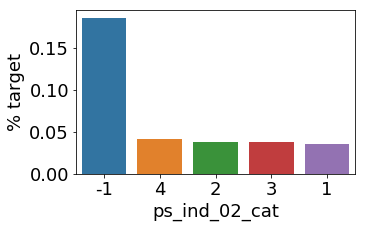

<Figure size 432x288 with 0 Axes>

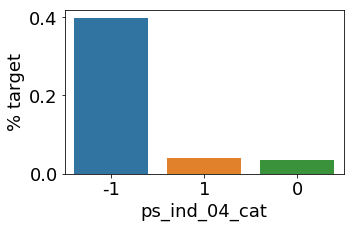

<Figure size 432x288 with 0 Axes>

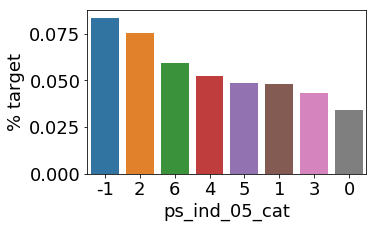

<Figure size 432x288 with 0 Axes>

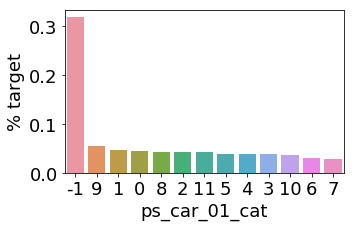

<Figure size 432x288 with 0 Axes>

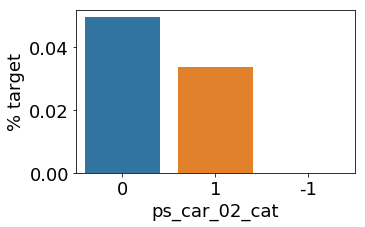

<Figure size 432x288 with 0 Axes>

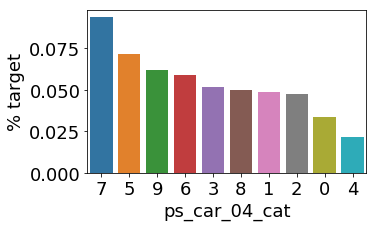

<Figure size 432x288 with 0 Axes>

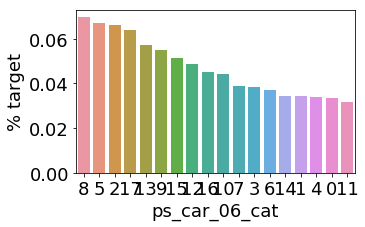

<Figure size 432x288 with 0 Axes>

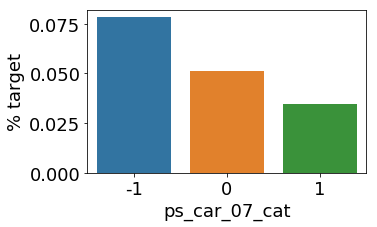

<Figure size 432x288 with 0 Axes>

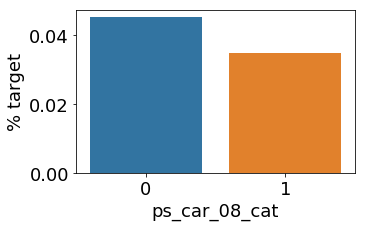

<Figure size 432x288 with 0 Axes>

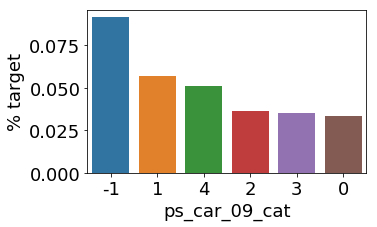

<Figure size 432x288 with 0 Axes>

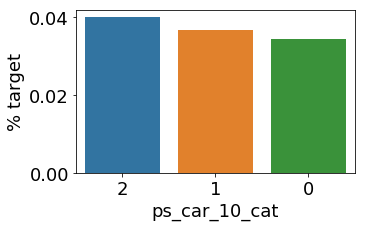

<Figure size 432x288 with 0 Axes>

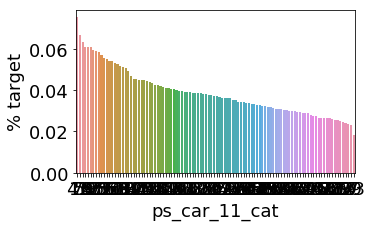

In [305]:
viz=Visualize(all_data_dic_imputed_NVC,meta_data_imputed)
viz.barplots() #nominal variables

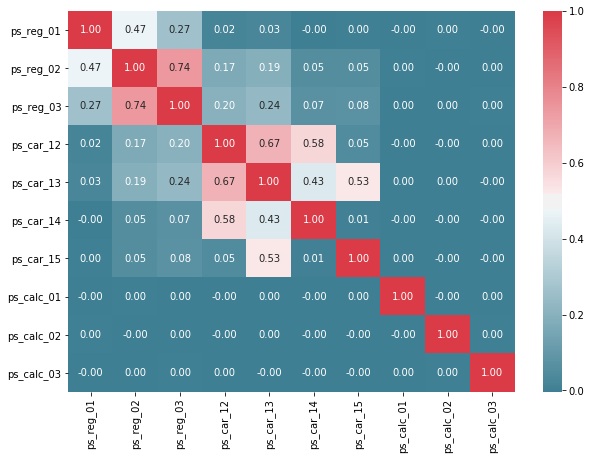

In [300]:
viz.corplots('interval')

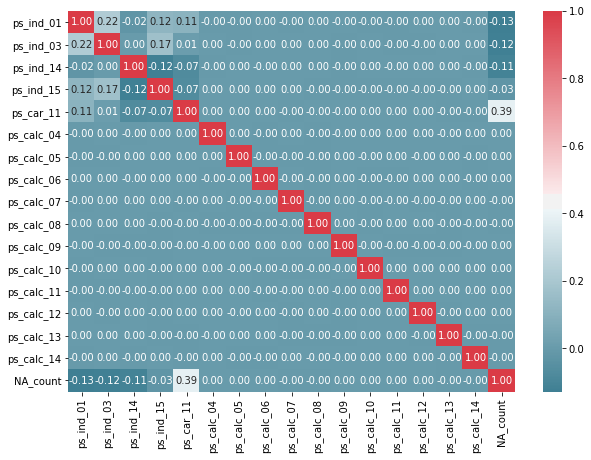

In [301]:
viz.corplots('ordinal') 
#Obervation from the below plot is
#'ps_calc' features do not show any or have zero relationship with other features.
#SO we can drop them.

### Feature Engineering

In [19]:
class feature_engineering:
    def __init__(self,meta,val_needed=False): 
        self.meta_data=meta
        self.val_needed=val_needed
    
    def merge_data(self,data):
        """
        Merges the data (which was a dic) into a DF
        """
        data['X_train']['data']='train'
        data['X_train']['target']=data['y_train']
        if self.val_needed:
            data['X_val']['data']='val'
            data['X_val']['target']=data['y_val']
        data['X_test']['data']='test'
        data['X_test']['target']=-1
        if self.val_needed:
            all_data=pd.concat([data['X_train'],data['X_val'],data['X_test']],axis=0)
        else:
            all_data=pd.concat([data['X_train'],data['X_test']],axis=0)
            
        all_data.reset_index(drop=True,inplace=True)
        return all_data
    
        
    def create_dummies(self,data):
        """
        input-> merged data(as a df)
        """
        nominal_variables= self.meta_data[(self.meta_data.level == 'nominal') & (self.meta_data.keep)].index
        print('Before creating dummies- Total variables: {}'.format(data.shape[1]))
        data=pd.get_dummies(data, columns=nominal_variables, drop_first=True)
        print('After creating dummies- Total variables: {}'.format(data.shape[1]))
        return data
    
    def interaction_vars(self,data_with_dummies,degree=2):
        """
        interaction of all interval variables. data_with_dummies(DF) & Degree as input
        """
        data=data_with_dummies        
        interval_varaibles=self.meta_data[(self.meta_data.level == 'interval') & (self.meta_data.keep)].index
        print('Before creating interactions we have {} variables'.format(data.shape[1]))
        
        higher_order=PolynomialFeatures(degree=degree,interaction_only=False,include_bias=False)
        interactions=pd.DataFrame(data=higher_order.fit_transform(data[interval_varaibles]),\
                                  columns=higher_order.get_feature_names(interval_varaibles))
        
        #drop the original variables as interaction variables include the original variables too
        interactions.drop(interval_varaibles,axis=1,inplace=True)
        all_data_inter_vars = pd.concat([data, interactions], axis=1)
        print('After creating interactions we have {} variables'.format(all_data_inter_vars.shape[1]))
        return all_data_inter_vars

In [20]:
feature_eng_instance=feature_engineering(meta_data_imputed_TE)
model_data_df=feature_eng_instance.merge_data(all_data_dic_imputed_TE)#TE done to all Categorical Variables

In [21]:
#wont create dummies but instead will use one of the Encodings (Target Encoding)
model_data_df_dummies=feature_eng_instance.create_dummies(model_data_df)

Before creating dummies- Total variables: 77
After creating dummies- Total variables: 77


In [22]:
model_data_df_dummies.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,NA_count,ps_reg_01_plus_ps_car_02_cat,ps_reg_01_plus_ps_car_04_cat,ps_ind_02_cat_TE,ps_ind_04_cat_TE,ps_ind_05_cat_TE,ps_car_01_cat_TE,ps_car_02_cat_TE,ps_car_04_cat_TE,ps_car_06_cat_TE,ps_car_07_cat_TE,ps_car_08_cat_TE,ps_car_09_cat_TE,ps_car_10_cat_TE,ps_car_11_cat_TE,ps_reg_01_plus_ps_car_02_cat_TE,ps_reg_01_plus_ps_car_04_cat_TE,data,target
0,7,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,0.370810,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,1,19,70,0.038139,0.038644,0.033865,0.036976,0.033772,0.033451,0.033851,0.034766,0.044933,0.033344,0.036464,0.038642,0.035967,0.035641,train,0
1,9,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,0.388716,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,2,21,80,0.035725,0.034790,0.033865,0.041581,0.033772,0.033451,0.031720,0.034766,0.034735,0.036319,0.036464,0.023936,0.036362,0.036098,train,0
2,13,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.720677,7,1,-1,0,-1,14,1,1,2,1,60,0.347275,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,3,1,0,0.040780,0.038644,0.033865,0.028770,0.033772,0.033451,0.034294,0.034766,0.034735,0.036319,0.036464,0.031281,0.037539,0.035427,train,0
3,16,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,0.294958,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,0,24,90,0.035725,0.034790,0.033865,0.028770,0.033772,0.033451,0.031720,0.034766,0.034735,0.035104,0.036464,0.045015,0.038214,0.038347,train,0
4,17,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,0.365103,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,2,19,70,0.038139,0.038644,0.033865,0.041581,0.033772,0.033451,0.034294,0.034766,0.034735,0.036319,0.036464,0.026266,0.035967,0.035641,train,0


### Feature Selection

In [35]:
class featureSelection:
    
    def __init__(self):
        pass
    
    def var_threshold(self,data,Variance_threshold=0.01):      
        selector = VarianceThreshold(threshold=Variance_threshold)
        selector.fit(data[data['data']=='train'].drop(['id','data', 'target'], axis=1))
        f = np.vectorize(lambda x : not x)
        v = data.drop(['id','data', 'target'], axis=1).columns[f(selector.get_support())]
        print('{} variables have less than threshold variance.'.format(len(v)))
        print('These variables are {}'.format(list(v)))
        clean_data=data.drop(v,axis=1)
        print('Final Clean variable count {}'.format(clean_data.shape[1]))
        return clean_data
    
    def RFE_CV(self,data,folds=3): #Recursive Feature Elimination with CV
        step = 5
        X_train=data[data['data']=='train'].drop(['id','data','target'],axis=1)
        y_train=data[data['data']=='train']['target']
        
        rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, n_jobs=-1)#could use other ALGO as well
        rfecv = RFECV(estimator=rfc,step=step,
              cv=StratifiedKFold(n_splits=folds,shuffle=False,random_state=1).split(X_train,y_train),scoring='roc_auc',n_jobs=1,
              verbose=0)
        rfecv.fit(X_train, y_train)
        print('\n Optimal number of features: {} out of total {}'.format(rfecv.n_features_,X_train.shape[1]))
        # Plot number of features VS. cross-validation scores
        plt.figure(figsize=(8, 6))
        plt.xlabel("Number of features selected *"+str(step))
        plt.ylabel("Cross-validation score (AUC))")
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
        plt.show()
        #delete the last few features
        ranking = pd.DataFrame({'Features': X_train.columns})
        ranking['Rank'] = np.asarray(rfecv.ranking_)
        ranking.sort_values('Rank', inplace=True)
        #select last 10 variables
        vars_to_be_kept=list(ranking.loc[:rfecv.n_features_,'Features'])
        vars_to_be_deleted=[i for i in X_train.columns if i not in vars_to_be_kept]
        print(len(vars_to_be_kept))
        print("=========")
        print(len(vars_to_be_deleted))
        print("Deleteing non important variables {}".format(vars_to_be_deleted[:]))
        clean_data_RFE_CV=data.drop(vars_to_be_deleted,axis=1)        
        return (clean_data_RFE_CV)
    
    def drop_columns(self,data,colnames):
        print('Before drop columns {}'.format(data.shape))
        data = data.drop(colnames, axis=1)
        print('After drop columns {}'.format(data.shape))
        return data        

In [36]:
fs_object=featureSelection()
clean_data1=fs_object.var_threshold(model_data_df_dummies,0.02) #0.02 is selected based on the output of Decribe Function

23 variables have less than threshold variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_car_10_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14', 'ps_ind_02_cat_TE', 'ps_ind_04_cat_TE', 'ps_ind_05_cat_TE', 'ps_car_01_cat_TE', 'ps_car_02_cat_TE', 'ps_car_04_cat_TE', 'ps_car_06_cat_TE', 'ps_car_07_cat_TE', 'ps_car_08_cat_TE', 'ps_car_09_cat_TE', 'ps_car_10_cat_TE', 'ps_car_11_cat_TE', 'ps_reg_01_plus_ps_car_02_cat_TE', 'ps_reg_01_plus_ps_car_04_cat_TE']
Final Clean variable count 54


In [37]:
%%time
#clean_data_RFE_CV=fs_object.RFE_CV(clean_data,5) #wont use this for now.
#Variables with 'calc' are not useful at all. Lets remove them. 'ps_calc' features
# do not show any or have zero relationship with other features.LOOK AT the Co-relation plot drawn earlier
col_to_drop = list(clean_data1.columns[clean_data1.columns.str.startswith('ps_calc_')])
clean_data=fs_object.drop_columns(clean_data1,col_to_drop)

Before drop columns (1488028, 54)
After drop columns (1488028, 34)
Wall time: 274 ms


In [ ]:
#guy having 12th place in competition removed variables all ps_calc_, ps_car_11_cat, psind11_bin

In [231]:
clean_data.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_11_cat', 'ps_car_13', 'ps_car_15', 'NA_count',
       'ps_reg_01_plus_ps_car_02_cat', 'ps_reg_01_plus_ps_car_04_cat', 'data',
       'target'],
      dtype='object')

In [257]:
#get the data
#Create train and test data
train_X=clean_data[clean_data['data']=='train'].drop(['id','data','target'],axis=1)
train_X=train_X.values
train_y=clean_data[clean_data['data']=='train']['target']
train_y=train_y.values
test_X=clean_data[clean_data['data']=='test'].drop(['id','data','target'],axis=1)
test_X=test_X.values

### Hyperparameter Tuning

In [310]:
class Hyper_param_tuning():
    def __init__(self,train_x,train_y,folds=3,random_search=True,n_estimators=400):
        self.train_x=train_x
        self.train_y=train_y
        #self.test_x=test_x
        self.folds=folds
        self.random_search=random_search
        self.n_estimators=n_estimators
        self.skf = StratifiedKFold(n_splits=self.folds, shuffle = True, random_state = 2017)
        
        
    def Tree_Model(self,params,model_name,param_comb=0):
        """
        model should be xgb or lgbm or rf in smalls
        """
        
        if model_name=='xgb':
            model=XGBClassifier(learning_rate=0.04,n_estimators=self.n_estimators ,objective='binary:logistic')
        elif model_name=='lgbm':
            model=lgb.LGBMClassifier(learning_rate=0.02,n_estimators=self.n_estimators ,objective='binary')
        else:
            model=XGBClassifier(class_weight='balanced')
        
        if self.random_search:
            if param_comb==0:
                print("Enter a postive value of param_comb")
                param_comb=int(input()) #total combinations to try, in grid search all combinations are tried
            search_obj = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, \
                          scoring='roc_auc', n_jobs=4, cv=skf.split(self.train_x,self.train_y), verbose=0, random_state=1001 )
        else:
            search_obj = GridSearchCV(estimator=model, param_grid=params,\
                                scoring='roc_auc', n_jobs=4, cv=skf.split(self.train_x,self.train_y), verbose=3)      
        
        search_obj.fit(train_X,train_y)
        print('\n Best estimator:')
        print(search_obj.best_estimator_) #gives values of all hyperparameters
        print('\n Best hyperparameters for {} Model are:'.format(model_name))
        print(search_obj.best_params_) #gives the best out of the parameter search space
        print('\n Best gini score for {}-fold search is {}'.format(self.folds,search_obj.best_score_ * 2 - 1))

In [311]:
tune=Hyper_param_tuning(train_X,train_y,5)

In [306]:
#XGB
# A parameter grid for XGBoost
params = {
        'min_child_weight': [15, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'alpha': [10.4,5,1],
        'lambda': [5,10,15]
            }

%%time
xgb=tune.Tree_Model(params=params,model_name='xgb',param_comb=50)
#Best hyperparameters for xgb Model are:
# {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'lambda': 10, 'gamma': 2, 'colsample_bytree': 0.8, 'alpha': 10.4}

#  Best gini score for 5-fold search is 0.28551847241100536, 14 hours

In [308]:
%%time
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':[0.6,0.8],    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
              'lambda_l1': [1,5],
              'lambda_l2':[ 0.01,0.5,10],
              'min_child_samples':[400,600],  #minimal number of data in one leaf
                'max_bin':[15,20], #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
                'subsample':[0.6,0.8],  #randomly select part of data without resampling
                'colsample_bytree':[0.8], #same as feature_fraction
               'boosting_type': ['dart'],   #options are gbdt(gradientboosting decision trees), rf,dart,goss
             'scale_pos_weight':[2,3,5]}  #weight of labels with positive class
lgbm=tune.Tree_Model(params=lgbm_params,model_name='lgbm',param_comb=50)

# Best hyperparameters for lgbm Model are:
# {'subsample': 0.8, 'scale_pos_weight': 5, 'min_child_samples': 600, 'max_bin': 20, 'lambda_l2': 0.01, 
#'lambda_l1': 1, 'colsample_bytree': 0.8, 'boosting_type': 'dart', 'bagging_fraction': 0.8}

#  Best gini score for 5-fold search is 0.27175684463467986, 6 hours


 Best estimator:
LGBMClassifier(bagging_fraction=0.8, boosting_type='dart', class_weight=None,
        colsample_bytree=0.8, importance_type='split', lambda_l1=1,
        lambda_l2=0.01, learning_rate=0.02, max_bin=20, max_depth=-1,
        min_child_samples=600, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        scale_pos_weight=5, silent=True, subsample=0.8,
        subsample_for_bin=200000, subsample_freq=0)

 Best hyperparameters for lgbm Model are:
{'subsample': 0.8, 'scale_pos_weight': 5, 'min_child_samples': 600, 'max_bin': 20, 'lambda_l2': 0.01, 'lambda_l1': 1, 'colsample_bytree': 0.8, 'boosting_type': 'dart', 'bagging_fraction': 0.8}

 Best gini score for 5-fold search is 0.27175684463467986
Wall time: 6h 29min 29s


In [ ]:
%%time
#Tune a RF model
rf_params = {'n_estimators': [2000],
              'max_features': ['sqrt','auto'], #, 'sqrt','auto'
              'criterion':  ['gini'], #'entropy',
              'max_depth': [30,40,50,80],
              'min_samples_leaf': [40,25,50,15]
            # 'min_samples_split':5,
            }
rfc=tune.Tree_Model(params=rf_params,model_name='rf',param_comb=30)

### Final Modelling- Level 1

In [146]:
#Provide a K-fold function that generate out-of-fold predictions for train data.
class Modelling():
    def __init__(self,X,y,test_X,skf,N):
        self.X=X
        self.y=y
        self.test_X=test_X
        self.skf=skf
        self.N=N
     
    def Single_Model(self,clf): #for all other Models
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])        
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))           
            clf.fit(trn_x,trn_y)
            val_pred = clf.predict_proba(val_x)[:,1]
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']
            val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}, Gini_Norm score is {:.6f}'.format(index+1, val_auc,val_gini))
            #for test
            prob_test= clf.predict_proba(self.test_X)[:,1]
            stacker_test+=(prob_test/self.N)
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        train_gini=printScore(stacker_train,self.y)['Gini']
        print("CV score on TRAIN (OOF) is AUC: {}, GINI {}".format(train_auc,train_gini))   
        return stacker_test,stacker_train        
        
        
        
    def SingleRF_oof(self,params):
        clf_rf=RandomForestClassifier(rf_params,class_weight='balanced')
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))         
            clf_rf.fit(trn_x,trn_y)
            val_pred = clf_rf.predict_proba(val_x)[:,1]
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']
            val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}, Gini_Norm score is {:.6f}'.format(index+1, val_auc,val_gini))
            #for test
            prob_test= clf_rf.predict_proba(self.test_X)[:,1]
            stacker_test+=(prob_test/self.N)
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        train_gini=printScore(stacker_train,self.y)['Gini']
        print("CV score on TRAIN (OOF) is AUC: {}, GINI {}".format(train_auc,train_gini))   
        return stacker_test,stacker_train

    
    def SingleXGB_oof(self,params,num_boost_round):
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        dtest=xgb.DMatrix(self.test_X)
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            dtrn = xgb.DMatrix(data=trn_x, label=trn_y)
            dval = xgb.DMatrix(data=val_x, label=val_y)
            print('Train model in fold {}'.format(index+1)) 
            cv_model = xgb.train(params=params,dtrain=dtrn,num_boost_round=num_boost_round\
                                 ,evals=[(dtrn, 'train'), (dval, 'val')],verbose_eval=10,early_stopping_rounds=50)
            
            prob_test = cv_model.predict(dtest, ntree_limit=cv_model.best_ntree_limit)
            stacker_test+=(prob_test/self.N)
            val_pred=cv_model.predict(dval, ntree_limit=cv_model.best_ntree_limit)
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']
            val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}, Gini_Norm score is {:.6f}'.format(index+1, val_auc,val_gini))
            
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        train_gini=printScore(stacker_train,self.y)['Gini']
        print("CV score on TRAIN (OOF) is AUC: {}, GINI {}".format(train_auc,train_gini))   
        return stacker_test,stacker_train
    
    
    def SingleLGBM_oof(self,params,num_boost_round):
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]

            print('Train model in fold {}'.format(index+1)) 
            lgb_train = lgb.Dataset(trn_x,trn_y)
            lgb_val = lgb.Dataset(val_x, val_y, reference=lgb_train)
            
            lgb_model = lgb.train(params,
                        lgb_train,
                        num_boost_round=num_boost_round,
                        valid_sets=lgb_val,
                        early_stopping_rounds=30,
                        verbose_eval=10)
            
            val_pred=lgb_model.predict(val_x)
            val_auc=printScore(val_pred,val_y)['auc']
            val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}, Gini_Norm score is {:.6f}'.format(index+1, val_auc,val_gini))
            stacker_train[val_idx,0]=val_pred

            prob_test = lgb_model.predict(self.test_X)
            stacker_test+=(prob_test/self.N)
            
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        train_gini=printScore(stacker_train,self.y)['Gini']
        print("CV score on TRAIN (OOF) is AUC: {}, GINI {}".format(train_auc,train_gini))   
        return stacker_test,stacker_train 

In [147]:
#call the models
Number_of_folds = 5
#We have to make sure same K fold splits are used for all Models. This avoids Overfitting and Leakage
comm_skf = StratifiedKFold(n_splits=Number_of_folds, shuffle=True, random_state=2017)
skf = comm_skf
modelling_object = Modelling(X=train_X, y=train_y, test_X=test_X, skf=skf, N=Number_of_folds)

In [119]:
#Call XGB
params_for_xgb = {
    'objective': 'binary:logistic',  #the learning task and the corresponding learning objective
    'eval_metric': 'auc',            #Evaluation metrics for validation data
    'eta': 0.04,          #learning_rate          
    'max_depth': 5,       #Maximum depth of a tree. High will make the model more complex and more likely to overfit.
    'min_child_weight': 9.15, #[0,inf] Higher the value,lesser the number of splits
    'gamma': 0.59,       #Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': 0.8,    #Subsample ratio of the training instances
    'colsample_bytree': 0.8,  #subsample ratio of columns when constructing each tree
    'alpha': 10.4,  #L1 regularization term on weights
    'lambda': 5,    #L2 regularization term
    'seed': 2017}

test_prob_stacked_xgb,stacker_train_xgb=modelling_object.SingleXGB_oof(params=params_for_xgb,num_boost_round=400)

Train model in fold 1
[0]	train-logloss:0.65920	val-logloss:0.65942
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.43025	val-logloss:0.43025
[20]	train-logloss:0.31005	val-logloss:0.31012
[30]	train-logloss:0.24245	val-logloss:0.24248
[40]	train-logloss:0.20349	val-logloss:0.20353
[50]	train-logloss:0.18096	val-logloss:0.18105
[60]	train-logloss:0.16811	val-logloss:0.16824
[70]	train-logloss:0.16087	val-logloss:0.16105
[80]	train-logloss:0.15682	val-logloss:0.15707
[90]	train-logloss:0.15456	val-logloss:0.15489
[100]	train-logloss:0.15328	val-logloss:0.15368
[110]	train-logloss:0.15252	val-logloss:0.15301
[120]	train-logloss:0.15205	val-logloss:0.15260
[130]	train-logloss:0.15172	val-logloss:0.15237
[140]	train-logloss:0.15148	val-logloss:0.15220
[150]	train-logloss:0.15129	val-logloss:0.15210
[160]	train-logloss:0.15112	val-logloss:0.15201
[170]	train-logloss:0.1509

[310]	train-logloss:0.14961	val-logloss:0.15186
[320]	train-logloss:0.14954	val-logloss:0.15184
[330]	train-logloss:0.14946	val-logloss:0.15184
[340]	train-logloss:0.14939	val-logloss:0.15184
[350]	train-logloss:0.14933	val-logloss:0.15183
[360]	train-logloss:0.14925	val-logloss:0.15182
[370]	train-logloss:0.14918	val-logloss:0.15181
[380]	train-logloss:0.14912	val-logloss:0.15180
[390]	train-logloss:0.14905	val-logloss:0.15180
[399]	train-logloss:0.14900	val-logloss:0.15179
fold 4 AUC score on VAL is 0.642434, Gini_Norm score is 0.284867
Train model in fold 5
[0]	train-logloss:0.65917	val-logloss:0.65938
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.43035	val-logloss:0.43024
[20]	train-logloss:0.31010	val-logloss:0.31008
[30]	train-logloss:0.24246	val-logloss:0.24243
[40]	train-logloss:0.20351	val-logloss:0.20343
[50]	train-logloss:0.18100	val-logloss:0.18094
[60]	

In [223]:
#Call LightGBM
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              "learning_rate" : 0.02,
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':0.6,    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
              # 'lambda_l1': 1,
              # 'lambda_l2': 0.01,
              'min_child_samples':600,  #minimal number of data in one leaf
                'max_bin':20, #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
                'subsample':0.8,  #randomly select part of data without resampling
                'colsample_bytree':0.8, #same as feature_fraction
               'boosting_type': 'dart',   #options are gbdt(gradientboosting decision trees), rf,dart,goss
               'task': 'train',
             'scale_pos_weight':3}  #weight of labels with positive class

test_prob_stacked_lgb,stacker_train_lgb=modelling_object.SingleLGBM_oof(params=lgbm_params,num_boost_round=900)

Train model in fold 1
fold 1 AUC score on VAL is 0.641076, Gini_Norm score is 0.282153
Train model in fold 2
fold 2 AUC score on VAL is 0.638920, Gini_Norm score is 0.277841
Train model in fold 3
fold 3 AUC score on VAL is 0.641032, Gini_Norm score is 0.282063
Train model in fold 4
fold 4 AUC score on VAL is 0.638128, Gini_Norm score is 0.276256
Train model in fold 5
fold 5 AUC score on VAL is 0.645697, Gini_Norm score is 0.291394
CV score on TRAIN (OOF) is AUC: 0.6409330483763725, GINI 0.2818660967527451


In [145]:
#Call RF
rf_params = {'n_estimators': 550,
              'max_features': 'log2', #, 'sqrt','auto'
              'criterion':  'gini', #'entropy',
              'max_depth': 30,
              'min_samples_leaf': 40,
            # 'min_samples_split':5,
             'class_weight':'balanced',
             'random_state':0
            }

test_prob_stacked_rf,stacker_train_rf=modelling_object.SingleRF_oof(params=rf_params)

Train model in fold 1
fold 1 AUC score on VAL is 0.532695, Gini_Norm score is 0.065390
Train model in fold 2
fold 2 AUC score on VAL is 0.531704, Gini_Norm score is 0.063409
Train model in fold 3
fold 3 AUC score on VAL is 0.532139, Gini_Norm score is 0.064278
Train model in fold 4
fold 4 AUC score on VAL is 0.536684, Gini_Norm score is 0.073369
Train model in fold 5
fold 5 AUC score on VAL is 0.528154, Gini_Norm score is 0.056308
CV score on TRAIN (OOF) is AUC: 0.5322746353366862, GINI 0.06454927067337235


In [148]:
#Call Logistic Regression
logit=LogisticRegression(random_state=0, C=0.5,class_weight='balanced')
test_prob_stacked_logreg,stacker_train_logreg=modelling_object.Single_Model(logit)

Train model in fold 1
fold 1 AUC score on VAL is 0.624569, Gini_Norm score is 0.249138
Train model in fold 2
fold 2 AUC score on VAL is 0.617013, Gini_Norm score is 0.234025
Train model in fold 3
fold 3 AUC score on VAL is 0.618591, Gini_Norm score is 0.237183
Train model in fold 4
fold 4 AUC score on VAL is 0.619866, Gini_Norm score is 0.239732
Train model in fold 5
fold 5 AUC score on VAL is 0.628072, Gini_Norm score is 0.256143
CV score on TRAIN (OOF) is AUC: 0.6215863547179987, GINI 0.24317270943599745


In [151]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
test_prob_stacked_nb,stacker_train_nb=modelling_object.Single_Model(nb)

Train model in fold 1
fold 1 AUC score on VAL is 0.610759, Gini_Norm score is 0.221518
Train model in fold 2
fold 2 AUC score on VAL is 0.606347, Gini_Norm score is 0.212693
Train model in fold 3
fold 3 AUC score on VAL is 0.606183, Gini_Norm score is 0.212365
Train model in fold 4
fold 4 AUC score on VAL is 0.608576, Gini_Norm score is 0.217152
Train model in fold 5
fold 5 AUC score on VAL is 0.617827, Gini_Norm score is 0.235653
CV score on TRAIN (OOF) is AUC: 0.6099090073327849, GINI 0.21981801466556972


### Modelling- Level 2

In [157]:
#generate L1 output dataframe
columns=['xgb','lgbm','rf','logit','nb']
train_pred_df_list=[stacker_train_xgb, stacker_train_lgb, stacker_train_rf, stacker_train_logreg,stacker_train_nb]
test_pred_df_list=[test_prob_stacked_xgb,test_prob_stacked_lgb,test_prob_stacked_rf,test_prob_stacked_logreg,test_prob_stacked_nb]

In [192]:
lv1_train_df=pd.DataFrame(columns=columns)
lv1_test_df=pd.DataFrame(columns=columns)
for i in range(len(columns)):
    lv1_train_df[columns[i]]=train_pred_df_list[i][:,0]
    lv1_test_df[columns[i]]=test_pred_df_list[i]

#Modelling object requires the data as arrays
lv1_train_df=lv1_train_df.values
lv1_test_df=lv1_test_df.values    
modelling_object_lvl2 = Modelling(X=lv1_train_df, y=train_y, test_X=lv1_test_df, skf=skf, N=Number_of_folds)

In [194]:
#Level 2 XGB
params_for_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.04,
    'max_depth': 5,
    'min_child_weight': 9.15,
    'gamma': 0.59,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 10.4,
    'lambda': 5,
    'seed': 2017}

xgb_lv2_test_pred, xgb_lv2_train_pred =modelling_object_lvl2.SingleXGB_oof(params=params_for_xgb,num_boost_round=400)

Train model in fold 1
[0]	train-auc:0.63142	val-auc:0.63277
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.64184	val-auc:0.64273
[20]	train-auc:0.64286	val-auc:0.64286
[30]	train-auc:0.64322	val-auc:0.64328
[40]	train-auc:0.64406	val-auc:0.64379
[50]	train-auc:0.64490	val-auc:0.64431
[60]	train-auc:0.64525	val-auc:0.64477
[70]	train-auc:0.64571	val-auc:0.64492
[80]	train-auc:0.64596	val-auc:0.64495
[90]	train-auc:0.64643	val-auc:0.64516
[100]	train-auc:0.64687	val-auc:0.64507
[110]	train-auc:0.64754	val-auc:0.64499
[120]	train-auc:0.64804	val-auc:0.64488
[130]	train-auc:0.64866	val-auc:0.64470
[140]	train-auc:0.64929	val-auc:0.64443
Stopping. Best iteration:
[91]	train-auc:0.64646	val-auc:0.64516

fold 1 AUC score on VAL is 0.645161, Gini_Norm score is 0.290322
Train model in fold 2
[0]	train-auc:0.62854	val-auc:0.62367
Multiple eval metrics have been passed: 'val-auc' will be u

In [214]:
#Our CV score for each training fold is pretty descent, but our overall training CV score just fell. Well, it turns out since
#we are using AUC/Gini as metric which is ranking dependent, and it turns out that if you apply xgb and lgb at level 2 stacking,
#the ranking get messed up when each fold's prediction scores are put together.
#SOLUTION convert probability into ranks
xgb_lv2_test_pred_rank=probability_to_rank(xgb_lv2_test_pred)
xgb_lv2_train_pred_rank=probability_to_rank(xgb_lv2_train_pred[:,0])
#Y values of train train_y as before
printScore(xgb_lv2_train_pred_rank, train_y)

{'auc': 0.6194945897494155, 'Gini': 0.23898917949883103}

In [195]:
#Level 2 LightGBM
lgbm_params= {"max_depth": 5,
              "learning_rate" : 0.1,
              "num_leaves": 25,
               'feature_fraction':0.6,
               'bagging_fraction':0.4,
               'max_drop': 5,
               'lambda_l1': 1,
               'lambda_l2': 0.01,
               'boosting_type': 'dart',
               'task': 'train'}

lgbm_lv2_test_pred, lgbm_lv2_train_pred  =  modelling_object_lvl2.SingleXGB_oof (params=lgbm_params,num_boost_round=400)

Train model in fold 1
[10:05:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bagging_fraction, boosting_type, feature_fraction, lambda_l1, lambda_l2, max_drop, num_leaves, task } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.45729	val-rmse:0.45727
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.23634	val-rmse:0.23647
[20]	train-rmse:0.19286	val-rmse:0.19312
[30]	train-rmse:0.18679	val-rmse:0.18718
[40]	train-rmse:0.18595	val-rmse:0.18647
[50]	train-rmse:0.18577	val-rmse:0.18640
[60]	train-rmse:0.18567	val-rmse:0.18640
[70]	train-rmse:0.18560	val-rmse:0.18641
[80]	train-rmse:0.18552	val-rmse:

In [217]:
#Level 2 RF
rf_params = {'n_estimators': 550,
              'max_features': 'log2', #, 'sqrt','auto'
              'criterion':  'gini', #'entropy',
              'max_depth': 30,
              'min_samples_leaf': 40,
            # 'min_samples_split':5,
             'class_weight':'balanced',
             'random_state':0
            }
rf_lv2_test_pred, rf_lv2_train_pred  =  modelling_object_lvl2.SingleRF_oof(params=rf_params)

Train model in fold 1
fold 1 AUC score on VAL is 0.528977, Gini_Norm score is 0.057955
Train model in fold 2
fold 2 AUC score on VAL is 0.530865, Gini_Norm score is 0.061729
Train model in fold 3
fold 3 AUC score on VAL is 0.528745, Gini_Norm score is 0.057490
Train model in fold 4
fold 4 AUC score on VAL is 0.530799, Gini_Norm score is 0.061598
Train model in fold 5
fold 5 AUC score on VAL is 0.531315, Gini_Norm score is 0.062631
CV score on TRAIN (OOF) is AUC: 0.5301380492778538, GINI 0.06027609855570759


In [218]:
#Call LEVEL 2 Logistic Regression
logit=LogisticRegression(random_state=0, C=0.5)
test_prob_stacked_logreg_lv2,stacker_train_logreg_lv2=modelling_object_lvl2.Single_Model(logit)

Train model in fold 1
fold 1 AUC score on VAL is 0.644226, Gini_Norm score is 0.288453
Train model in fold 2
fold 2 AUC score on VAL is 0.639627, Gini_Norm score is 0.279255
Train model in fold 3
fold 3 AUC score on VAL is 0.641401, Gini_Norm score is 0.282802
Train model in fold 4
fold 4 AUC score on VAL is 0.641863, Gini_Norm score is 0.283726
Train model in fold 5
fold 5 AUC score on VAL is 0.647649, Gini_Norm score is 0.295298
CV score on TRAIN (OOF) is AUC: 0.6429060615819351, GINI 0.28581212316387017
